# Introduction

In this notebook we look at the when, where, and how much regarding expired LIHTC (Low-Income Housing Tax Credit) projects. Not all analyses have been completed, so if you'd like to continue working on this, look for the "To Do" comments. 

Findings:

- The vast majority of expired projects have a year allocation date in the early 1990s. 

# Setup
## Data
VERY, VERY IMPORTANT PLEASE PROVIDE DEATILS ABOUT THE DATA YOU USED AND HOW TO GET IT SO OTHERS CAN RUN THIS AMAZING NOTEBOOK TOO

|Dataset               | Type           | Description                                     |  Where to get the data |
|----------------------|----------------|-------------------------------------------------|------------------------|
|LIHTCPUB.CSV          | CSV               | Low-Income Housing Tax Credit original data source                                                | https://github.com/datakind/affordable-housing-tooling/tree/main/workstream2/datasets OR https://www.huduser.gov/portal/datasets/lihtc/property.html                       |
| LIHTCPUB_Null_Removed.csv                     | CSV               | Some cleaning was done by the team, but it needs documentation/validation        | https://github.com/datakind/affordable-housing-tooling/tree/main/workstream2/datasets                       |
|                      |                |                                                 |                        |

## Assumptions

- We assume NaN values in column `nonprog` represent non-expired project, and code this as 0. The remaining values of `nonprog` are coded as 1, which we assume represent expired projects. 

In [117]:
# Add package installs here, for example ...
# !pip install pycurl

!python -V

!pip install pandas
!pip install seaborn

!pip list

Python 3.12.0
Package                   Version
------------------------- ------------
anyio                     4.0.0
appnope                   0.1.3
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.0
async-lru                 2.0.4
attrs                     23.1.0
Babel                     2.13.0
backcall                  0.2.0
beautifulsoup4            4.12.2
bleach                    6.1.0
certifi                   2023.7.22
cffi                      1.16.0
charset-normalizer        3.3.0
comm                      0.1.4
contourpy                 1.1.1
cycler                    0.12.1
debugpy                   1.8.0
decorator                 5.1.1
defusedxml                0.7.1
executing                 2.0.0
fastjsonschema            2.18.1
fonttools                 4.43.1
fqdn                      1.5.1
idna                      3.4
ipykernel                 6.25.2
ipython                   8.16.1
isod

In [53]:
import os

import numpy as np
import pandas as pd
import seaborn as sns

## Settings
PLEASE USE VARIABLES FOR THINGS LIKE FILE LOCATIONS AND CONFIGURATION SETTINGS

In [118]:
DATA_DIRECTORY = './datasets'

LIHTCPUB_DATA_PATH = os.path.join(DATA_DIRECTORY, 'LIHTCPUB.CSV')
LIHTCPUB_NULLS_REMOVED_DATA_PATH = os.path.join(DATA_DIRECTORY, 'LIHTCPUB_Null_Removed.csv')

In [120]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

## Data

In [121]:
df_original = pd.read_csv(LIHTCPUB_DATA_PATH)
# Subset to Florida-based projects
df_original_fl = df_original[df_original['proj_st'] == 'FL'].copy()
# Type casts
df_original_fl['yr_alloc'] = df_original_fl['yr_alloc'].astype('int')

/var/folders/x6/sjylc1gd7kx7zy6h7zzg45440000gn/T/ipykernel_39214/1447053413.py:1: DtypeWarning: Columns (72) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv(LIHTCPUB_DATA_PATH)


In [122]:
# This data source is based on `df_original` and may need additional validation and/or documentation
df_nulls_removed = pd.read_csv(LIHTCPUB_NULLS_REMOVED_DATA_PATH)
# Subset to Florida-based projects
df_nulls_removed_fl = df_nulls_removed[df_nulls_removed['proj_st'] == 'FL'].copy()
# Type casts
df_nulls_removed_fl['yr_alloc'] = df_nulls_removed_fl['yr_alloc'].astype('int')

In [123]:
df_original_fl.head()

,hud_id,project,proj_add,proj_cty,proj_st,proj_zip,state_id,latitude,longitude,place1990,place2000,place2010,fips1990,fips2000,fips2010,st2010,cnty2010,scattered_site_cd,resyndication_cd,allocamt,n_units,li_units,n_0br,n_1br,n_2br,n_3br,n_4br,inc_ceil,low_ceil,ceilunit,yr_pis,yr_alloc,non_prof,basis,bond,mff_ra,fmha_514,fmha_515,fmha_538,home,home_amt,tcap,tcap_amt,cdbg,cdbg_amt,htf,htf_amt,fha,hopevi,hpvi_amt,tcep,tcep_amt,rad,qozf,qozf_amt,rentassist,trgt_pop,trgt_fam,trgt_eld,trgt_dis,trgt_hml,trgt_other,trgt_spc,type,credit,n_unitsr,li_unitr,metro,dda,qct,nonprog,nlm_reason,nlm_spc,datanote,record_stat
8547,FLA00000005,ABSHIRE PROPERTY,1867 MOVA ST,SARASOTA,FL,34231,30,27.221191,-82.494667,793.0,28050.0,73725.0,12115002001,12115002005,12115002005,12,115,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8888,1988,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,X
8548,FLA00000010,AESOP PROPERTY,1405 ELBERTA DR,TALLAHASSEE,FL,32304,31,30.427732,-84.305244,2070.0,70600.0,70600.0,12073002001,12073002001,12073002006,12,73,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8888,1988,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,X
8549,FLA00000015,ALACHUA VILLAS,14000 NW 154TH AVE,ALACHUA,FL,32615,32,29.796204,-82.494324,NaN,375.0,375.0,12001001801,12001001801,12001001801,12,1,2.0,NaN,NaN,35.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8888,1988,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,35.0,35.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,X
8550,FLA00000020,ARCHER VILLAGE,506 E HIGH ST,ARCHER,FL,32618,41,29.511499,-82.531303,NaN,1775.0,1775.0,12001002201,12001002209,12001002209,12,1,2.0,NaN,NaN,23.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8888,1989,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,23.0,23.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,X
8551,FLA00000024,NORTHBRIDGE APT HOMES ON MILLENIA LAKE I,4902 MILLENIA BLVD,ORLANDO,FL,32839,1134,28.480059,-81.442039,NaN,50638.0,53000.0,12095014500,12095016903,12095016903,12,95,2.0,NaN,NaN,396.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8888,8888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396.0,396.0,1.0,NaN,NaN,NaN,NaN,NaN,PROPERTY IDENTIFIED IN 2014 LIHTC TENANT DATA ...,U


In [124]:
df_nulls_removed_fl.head()

,hud_id,project,proj_add,proj_cty,proj_st,proj_zip,state_id,latitude,longitude,place1990,place2000,place2010,fips1990,fips2000,fips2010,st2010,cnty2010,scattered_site_cd,resyndication_cd,allocamt,n_units,li_units,n_0br,n_1br,n_2br,n_3br,n_4br,inc_ceil,low_ceil,ceilunit,yr_pis,yr_alloc,non_prof,basis,bond,mff_ra,fmha_514,fmha_515,fmha_538,home,home_amt,tcap,tcap_amt,cdbg,cdbg_amt,htf,htf_amt,fha,hopevi,hpvi_amt,tcep,tcep_amt,rad,qozf,qozf_amt,rentassist,trgt_pop,trgt_fam,trgt_eld,trgt_dis,trgt_hml,trgt_other,trgt_spc,type,credit,n_unitsr,li_unitr,metro,dda,qct,nonprog,nlm_reason,nlm_spc,datanote,record_stat
7164,FLA19900015,CLAY SPRINGS,101 JOEY DR,GREEN COVE SPRINGS,FL,32043,171,29.983334,-81.688232,770.0,27400.0,27400.0,12019031400,12019031400,12019031400,12,19,2.0,NaN,NaN,51.0,51.0,0.0,12.0,33.0,6.0,0.0,NaN,NaN,NaN,1990,1990,2.0,2.0,2.0,NaN,2.0,1.0,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,51,51,1.0,NaN,2.0,NaN,NaN,NaN,NaN,X
7165,FLA19900045,JEFLIS APTS,2204 E 132ND AVE,TAMPA,FL,33612,401,28.067533,-82.434052,2127.0,71000.0,73163.0,12057010806,12057010806,12057010815,12,57,2.0,NaN,NaN,8.0,8.0,0.0,0.0,0.0,8.0,0.0,NaN,NaN,NaN,1990,1990,2.0,2.0,2.0,NaN,2.0,2.0,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,2.0,2.0,NaN,1.0,2.0,8,8,1.0,NaN,2.0,NaN,NaN,NaN,NaN,X
7166,FLA19910021,COLLEGE PARK,6435 COLLEGE PARK CIR,NAPLES,FL,34113,181,26.106750,-81.700928,1456.0,40037.0,40037.0,12021010800,12021010802,12021010802,12,21,2.0,NaN,NaN,210.0,210.0,0.0,0.0,210.0,0.0,0.0,NaN,NaN,NaN,1991,2000,2.0,2.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,210,210,1.0,NaN,2.0,NaN,NaN,NaN,PREVIOUSLY LISTED AS FLA1999055. AKA COLLEGE P...,X
7167,FLA19910025,GARDENIA SQUARE,501 S PARRAMORE ST,MADISON,FL,NaN,285,NaN,NaN,NaN,42425.0,NaN,12079990300,12079990302,12XXXXXXXXX,12,.,2.0,NaN,NaN,12.0,12.0,0.0,0.0,12.0,0.0,0.0,NaN,NaN,NaN,1991,1991,2.0,2.0,2.0,NaN,2.0,1.0,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,2.0,2.0,NaN,1.0,2.0,12,12,3.0,NaN,2.0,NaN,NaN,NaN,NaN,X
7168,FLA19910030,HASSINGER PROPERTIES PHASE C,1913 E 137TH AVE,TAMPA,FL,33613,335,28.071096,-82.437904,2127.0,73163.0,73163.0,12057010807,12057010807,12057010818,12,57,2.0,NaN,NaN,2.0,2.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,1991,1991,2.0,2.0,2.0,NaN,2.0,2.0,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2,2,1.0,NaN,2.0,NaN,NaN,NaN,NaN,X


## Analysis

We conduct our analyses using the original source data set (`df_original_fl`) as well as a modified data set (`df_nulls_removed_fl`) which a team member provided after some data cleaning (e.g. removing some null values), however the latter may need some documentation/validation.

### Quick Look at the data

In [125]:
print(f"Number of Florida projects in original data set: {len(df_original_fl)}")
print(f"Number of Florida projects (after nulls removed): {len(df_nulls_removed_fl)}")

Number of Florida projects in original data set: 1527
Number of Florida projects (after nulls removed): 1218


In [126]:
df_original_fl.head()

,hud_id,project,proj_add,proj_cty,proj_st,proj_zip,state_id,latitude,longitude,place1990,place2000,place2010,fips1990,fips2000,fips2010,st2010,cnty2010,scattered_site_cd,resyndication_cd,allocamt,n_units,li_units,n_0br,n_1br,n_2br,n_3br,n_4br,inc_ceil,low_ceil,ceilunit,yr_pis,yr_alloc,non_prof,basis,bond,mff_ra,fmha_514,fmha_515,fmha_538,home,home_amt,tcap,tcap_amt,cdbg,cdbg_amt,htf,htf_amt,fha,hopevi,hpvi_amt,tcep,tcep_amt,rad,qozf,qozf_amt,rentassist,trgt_pop,trgt_fam,trgt_eld,trgt_dis,trgt_hml,trgt_other,trgt_spc,type,credit,n_unitsr,li_unitr,metro,dda,qct,nonprog,nlm_reason,nlm_spc,datanote,record_stat
8547,FLA00000005,ABSHIRE PROPERTY,1867 MOVA ST,SARASOTA,FL,34231,30,27.221191,-82.494667,793.0,28050.0,73725.0,12115002001,12115002005,12115002005,12,115,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8888,1988,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,X
8548,FLA00000010,AESOP PROPERTY,1405 ELBERTA DR,TALLAHASSEE,FL,32304,31,30.427732,-84.305244,2070.0,70600.0,70600.0,12073002001,12073002001,12073002006,12,73,2.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8888,1988,2.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,X
8549,FLA00000015,ALACHUA VILLAS,14000 NW 154TH AVE,ALACHUA,FL,32615,32,29.796204,-82.494324,NaN,375.0,375.0,12001001801,12001001801,12001001801,12,1,2.0,NaN,NaN,35.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8888,1988,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,35.0,35.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,X
8550,FLA00000020,ARCHER VILLAGE,506 E HIGH ST,ARCHER,FL,32618,41,29.511499,-82.531303,NaN,1775.0,1775.0,12001002201,12001002209,12001002209,12,1,2.0,NaN,NaN,23.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8888,1989,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,23.0,23.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,X
8551,FLA00000024,NORTHBRIDGE APT HOMES ON MILLENIA LAKE I,4902 MILLENIA BLVD,ORLANDO,FL,32839,1134,28.480059,-81.442039,NaN,50638.0,53000.0,12095014500,12095016903,12095016903,12,95,2.0,NaN,NaN,396.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8888,8888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,396.0,396.0,1.0,NaN,NaN,NaN,NaN,NaN,PROPERTY IDENTIFIED IN 2014 LIHTC TENANT DATA ...,U


In [127]:
df_nulls_removed_fl.head()

,hud_id,project,proj_add,proj_cty,proj_st,proj_zip,state_id,latitude,longitude,place1990,place2000,place2010,fips1990,fips2000,fips2010,st2010,cnty2010,scattered_site_cd,resyndication_cd,allocamt,n_units,li_units,n_0br,n_1br,n_2br,n_3br,n_4br,inc_ceil,low_ceil,ceilunit,yr_pis,yr_alloc,non_prof,basis,bond,mff_ra,fmha_514,fmha_515,fmha_538,home,home_amt,tcap,tcap_amt,cdbg,cdbg_amt,htf,htf_amt,fha,hopevi,hpvi_amt,tcep,tcep_amt,rad,qozf,qozf_amt,rentassist,trgt_pop,trgt_fam,trgt_eld,trgt_dis,trgt_hml,trgt_other,trgt_spc,type,credit,n_unitsr,li_unitr,metro,dda,qct,nonprog,nlm_reason,nlm_spc,datanote,record_stat
7164,FLA19900015,CLAY SPRINGS,101 JOEY DR,GREEN COVE SPRINGS,FL,32043,171,29.983334,-81.688232,770.0,27400.0,27400.0,12019031400,12019031400,12019031400,12,19,2.0,NaN,NaN,51.0,51.0,0.0,12.0,33.0,6.0,0.0,NaN,NaN,NaN,1990,1990,2.0,2.0,2.0,NaN,2.0,1.0,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,51,51,1.0,NaN,2.0,NaN,NaN,NaN,NaN,X
7165,FLA19900045,JEFLIS APTS,2204 E 132ND AVE,TAMPA,FL,33612,401,28.067533,-82.434052,2127.0,71000.0,73163.0,12057010806,12057010806,12057010815,12,57,2.0,NaN,NaN,8.0,8.0,0.0,0.0,0.0,8.0,0.0,NaN,NaN,NaN,1990,1990,2.0,2.0,2.0,NaN,2.0,2.0,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,2.0,2.0,NaN,1.0,2.0,8,8,1.0,NaN,2.0,NaN,NaN,NaN,NaN,X
7166,FLA19910021,COLLEGE PARK,6435 COLLEGE PARK CIR,NAPLES,FL,34113,181,26.106750,-81.700928,1456.0,40037.0,40037.0,12021010800,12021010802,12021010802,12,21,2.0,NaN,NaN,210.0,210.0,0.0,0.0,210.0,0.0,0.0,NaN,NaN,NaN,1991,2000,2.0,2.0,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,210,210,1.0,NaN,2.0,NaN,NaN,NaN,PREVIOUSLY LISTED AS FLA1999055. AKA COLLEGE P...,X
7167,FLA19910025,GARDENIA SQUARE,501 S PARRAMORE ST,MADISON,FL,NaN,285,NaN,NaN,NaN,42425.0,NaN,12079990300,12079990302,12XXXXXXXXX,12,.,2.0,NaN,NaN,12.0,12.0,0.0,0.0,12.0,0.0,0.0,NaN,NaN,NaN,1991,1991,2.0,2.0,2.0,NaN,2.0,1.0,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,2.0,2.0,NaN,1.0,2.0,12,12,3.0,NaN,2.0,NaN,NaN,NaN,NaN,X
7168,FLA19910030,HASSINGER PROPERTIES PHASE C,1913 E 137TH AVE,TAMPA,FL,33613,335,28.071096,-82.437904,2127.0,73163.0,73163.0,12057010807,12057010807,12057010818,12,57,2.0,NaN,NaN,2.0,2.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,1991,1991,2.0,2.0,2.0,NaN,2.0,2.0,NaN,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,2.0,0.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,2,2,1.0,NaN,2.0,NaN,NaN,NaN,NaN,X


### Analysis of column `nonprog`

#### Column description

From the LIHTC data dictionary, we have the following description of the `nonprog` column:

"No longer monitored for LIHTC program compliance due to expired use or other reason <sub>2012</sub> (Status of no longer being monitored for the LIHTC Program is indicated for projects as specified by the allocating agency. This does not indicate whether or not a project remains affordable to low income populations.)"

And the corresponding text for footnote 2012:

"Information first requested with the 2012 properties: TCAP; TCAP_AMT; TCEP; TCEP_AMT"

Value Labels: 
1=Yes

### Counts using original data

In [128]:
num_nonprog_nan = np.isnan(df_original_fl['nonprog']).sum()
print(f"Number of NaN (e.g. null/missing) values for column nonprog: {num_nonprog_nan}")

num_nonprog_values = len(df_original_fl[~np.isnan(df_original_fl['nonprog'])])
print(f"Number of (non-null/non-missing) values for column nonprog: {num_nonprog_values}")

nonprog_min = df_original_fl[~np.isnan(df_original_fl['nonprog'])]['nonprog'].min()
nonprog_max = df_original_fl[~np.isnan(df_original_fl['nonprog'])]['nonprog'].max()
print(f"nonprog min value for data with nulls removed: {nonprog_min}")
print(f"nonprog max value for data with nulls removed: {nonprog_min}")

Number of NaN (e.g. null/missing) values for column nonprog: 1325
Number of (non-null/non-missing) values for column nonprog: 202
nonprog min value for data with nulls removed: 1.0
nonprog max value for data with nulls removed: 1.0


### Counts using data with nulls removed

In [129]:
num_nonprog_nan = np.isnan(df_nulls_removed_fl['nonprog']).sum()
print(f"Number of NaN (e.g. null/missing) values for column nonprog: {num_nonprog_nan}")

num_nonprog_values = len(df_nulls_removed_fl[~np.isnan(df_nulls_removed_fl['nonprog'])])
print(f"Number of (non-null/non-missing) values for column nonprog: {num_nonprog_values}")

nonprog_min = df_nulls_removed_fl[~np.isnan(df_nulls_removed_fl['nonprog'])]['nonprog'].min()
nonprog_max = df_nulls_removed_fl[~np.isnan(df_nulls_removed_fl['nonprog'])]['nonprog'].max()
print(f"nonprog min value for data with nulls removed: {nonprog_min}")
print(f"nonprog max value for data with nulls removed: {nonprog_min}")

Number of NaN (e.g. null/missing) values for column nonprog: 1175
Number of (non-null/non-missing) values for column nonprog: 43
nonprog min value for data with nulls removed: 1.0
nonprog max value for data with nulls removed: 1.0


### Recoding of `nonprog`

We can see above that the `nonprog` column consists of either NaN (e.g. null/missing) values or else is equal to 1. Hence, moving forward, we will <b>make the assumption</b> that NaN corresponds to non-expired which we will code as 0, while 1 corresponds to expired. 

In [130]:
df_original_fl['expired'] = df_original_fl['nonprog'].replace({np.NaN: 0, 1: 1})
print("Expired project counts for original dataset")
df_original_fl['expired'].value_counts()

Expired project counts for original dataset


expired
0.0    1325
1.0     202
Name: count, dtype: int64

In [131]:
df_nulls_removed_fl['expired'] = df_nulls_removed_fl['nonprog'].replace({np.NaN: 0, 1: 1})
print("Expired project counts for dataset with nulls removed:")
df_nulls_removed_fl['expired'].value_counts()

Expired project counts for dataset with nulls removed:


expired
0.0    1175
1.0      43
Name: count, dtype: int64

### The When, Where, and How Much corresponding to expired projects

#### When - Original Dataset

Columns of interest:

- YR_ALLOC - "Allocation year"

In [56]:
invalid_date_values = [9999, 8888]
invalid_date_filter = ~df_original_fl['yr_alloc'].isin(invalid_date_values)
df_original_fl_yr_alloc = df_original_fl['yr_alloc'][invalid_date_filter].value_counts().sort_index()

Text(0, 0.5, 'Number of Projects')

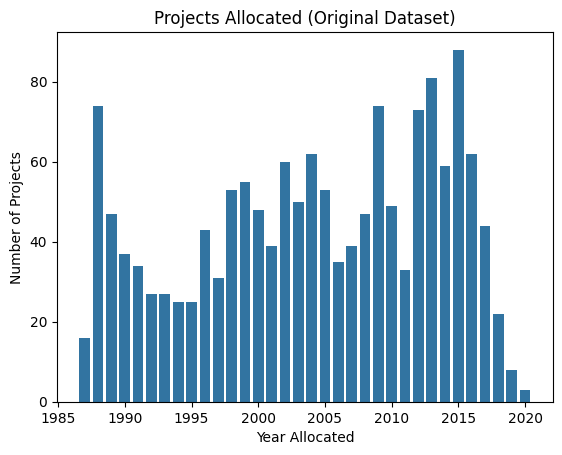

In [85]:
fig = sns.barplot(df_original_fl_yr_alloc, native_scale=True)
fig.set_title('Projects Allocated (Original Dataset)')
fig.set_xlabel("Year Allocated")
fig.set_ylabel("Number of Projects")

In [82]:
invalid_date_values = [9999, 8888]
invalid_date_filter = ~df_original_fl['yr_alloc'].isin(invalid_date_values)
expired_filter = df_original_fl['expired'] == 1
df_original_fl_yr_alloc_expired = df_original_fl['yr_alloc'][invalid_date_filter & expired_filter].value_counts().sort_index()

Text(0, 0.5, 'Number of Projects')

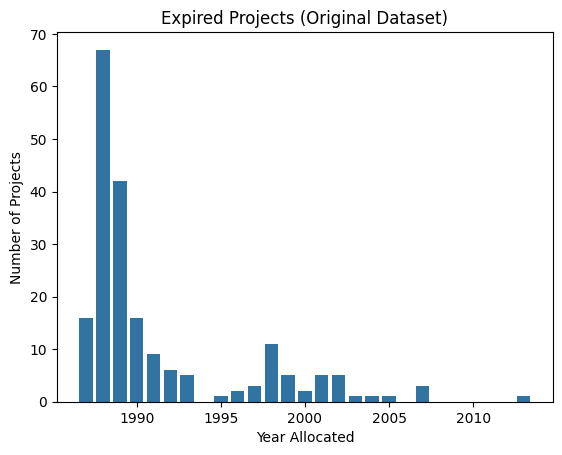

In [84]:
fig = sns.barplot(df_original_fl_yr_alloc_expired, native_scale=True)
fig.set_title('Expired Projects (Original Dataset)')
fig.set_xlabel("Year Allocated")
fig.set_ylabel("Number of Projects")

#### When - Dataset with nulls removed

Comment: The plot looks fairly similar to the plot using the original data source. 

In [87]:
invalid_date_values = [9999, 8888]
invalid_date_filter = ~df_nulls_removed_fl['yr_alloc'].isin(invalid_date_values)
df_nulls_removed_fl_yr_alloc = df_nulls_removed_fl['yr_alloc'][invalid_date_filter].value_counts().sort_index()

Text(0, 0.5, 'Number of Projects')

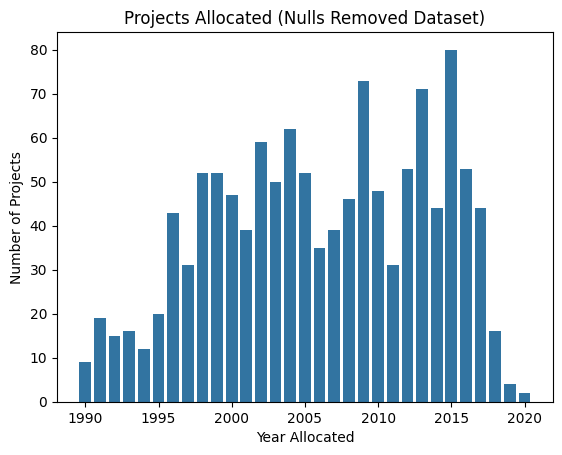

In [88]:
fig = sns.barplot(df_nulls_removed_fl_yr_alloc, native_scale=True)
fig.set_title('Projects Allocated (Nulls Removed Dataset)')
fig.set_xlabel("Year Allocated")
fig.set_ylabel("Number of Projects")

In [89]:
invalid_date_values = [9999, 8888]
invalid_date_filter = ~df_nulls_removed_fl['yr_alloc'].isin(invalid_date_values)
expired_filter = df_nulls_removed_fl['expired'] == 1
df_nulls_removed_fl_yr_alloc_expired = df_nulls_removed_fl['yr_alloc'][invalid_date_filter & expired_filter].value_counts().sort_index()

Text(0, 0.5, 'Number of Projects')

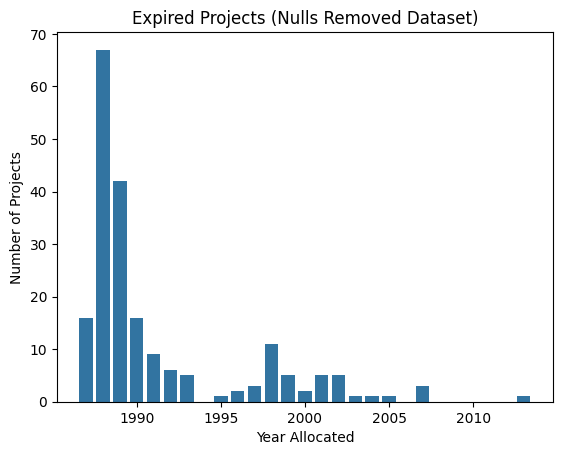

In [90]:
fig = sns.barplot(df_original_fl_yr_alloc_expired, native_scale=True)
fig.set_title('Expired Projects (Nulls Removed Dataset)')
fig.set_xlabel("Year Allocated")
fig.set_ylabel("Number of Projects")

#### Where

Columns of interest:

- PROJ_CTY
- PROJ_ZIP
- LATITUDE - "Latitude: Degrees Decimal"
- LONGITUD - "Longitude: Negative Degrees Decimal -- GIS Mapping N Convention"
- PLACECE - "Census Place Code (1990)"
- PLACE2010 - "FIPS Place Code (2010)"

To Do: Look at expired projects by location. 

#### How Much - Original Dataset

Out of 1527 projects in the original data set, 885 have missing values for the allocation amount. Hence, missing data is a limiting factor for analysis here. 

Columns of interest:

- ALLOCAMT - "Annual dollar amount of tax credits allocated <sub>2006</sub>"

To Do: Bin the `allocamt` into ranges and create a plot of expired projects versus the allocation amount bins, as well as a plot for the total projects versus teh allocation amount bins. 

In [132]:
print(f"Out of {len(df_original_fl['allocamt'])} projects in the original data set, {np.isnan(df_original_fl['allocamt']).sum()} have missing values for the allocation amount.")

Out of 1527 projects in the original data set, 885 have missing values for the allocation amount.


In [115]:
num_zero_allocation = len(df_original_fl_no_missing_allocamt[df_original_fl_no_missing_allocamt['allocamt'] == 0])
print(f"There are {num_zero_allocation} projects with an allocated amount of $0")

There are 4 projects with an allocated amount of $0


In [107]:
df_original_fl_no_missing_allocamt = df_original_fl[~np.isnan(df_original_fl['allocamt'])]

In [110]:
df_original_fl_no_missing_allocamt[['allocamt', 'expired']]

,allocamt,expired
8752,1758308.0,1.0
8786,1404547.0,0.0
8795,848250.0,0.0
8797,329973.0,0.0
8834,626807.0,0.0
...,...,...
10069,0.0,0.0
10070,1500000.0,0.0
10071,925344.0,0.0
10072,2110000.0,0.0


#### How much - Dataset with nulls removed

To Do: Repeat analysis above with the dataset with nulls removed. 